In [19]:
# ---------------------------------Load Odrive----------------------------------------------------

In [347]:
"""
Example usage of the ODrive python library to monitor and control ODrive devices
"""

from __future__ import print_function

import odrive
from odrive.enums import *
import time, sys
import math
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from tqdm import tnrange

# Find a connected ODrive (this will block until you connect one)
print("finding an odrive...")
my_drive = odrive.find_any()

# Find an ODrive that is connected on the serial port /dev/ttyUSB0
#my_drive = odrive.find_any("serial:/dev/ttyUSB0")

finding an odrive...


In [247]:
# -------------------------------------Reboot-------------------------------------------------------

In [346]:
my_drive.reboot()

ChannelBrokenException: 

In [57]:
# ---------------------------------Configuration Values----------------------------------------------

In [341]:
my_drive.axis0.controller.config, my_drive.axis0.motor.config, my_drive.axis0.encoder.config

(control_mode = 3 (int)
 pos_gain = 5.0 (float)
 vel_gain = 0.0003000000142492354 (float)
 vel_integrator_gain = 0.0 (float)
 vel_limit = 20000.0 (float), pre_calibrated = True (bool)
 pole_pairs = 7 (int)
 calibration_current = 8.0 (float)
 resistance_calib_max_voltage = 2.0 (float)
 phase_inductance = 0.0 (float)
 phase_resistance = 0.0 (float)
 direction = -1 (int)
 motor_type = 2 (int)
 current_lim = 20.0 (float)
 requested_current_range = 60.0 (float), mode = 0 (int)
 use_index = True (bool)
 pre_calibrated = True (bool)
 idx_search_speed = 10.0 (float)
 cpr = 8192 (int)
 offset = 7136 (int)
 offset_float = 1.393671989440918 (float)
 calib_range = 0.019999999552965164 (float))

In [71]:
my_drive.axis1.controller.config, my_drive.axis1.motor.config, my_drive.axis1.encoder.config

(control_mode = 3 (int)
 pos_gain = 5.0 (float)
 vel_gain = 0.0003000000142492354 (float)
 vel_integrator_gain = 0.0 (float)
 vel_limit = 20000.0 (float), pre_calibrated = True (bool)
 pole_pairs = 7 (int)
 calibration_current = 8.0 (float)
 resistance_calib_max_voltage = 2.0 (float)
 phase_inductance = 0.0 (float)
 phase_resistance = 0.0 (float)
 direction = -1 (int)
 motor_type = 2 (int)
 current_lim = 20.0 (float)
 requested_current_range = 60.0 (float), mode = 0 (int)
 use_index = True (bool)
 pre_calibrated = True (bool)
 idx_search_speed = 10.0 (float)
 cpr = 8192 (int)
 offset = 10963 (int)
 offset_float = 0.6993386745452881 (float)
 calib_range = 0.019999999552965164 (float))

In [180]:
my_drive.vbus_voltage

24.231958389282227

In [ ]:
# ---------------------------------Motor Setup----------------------------------------------------------

In [72]:
# Motor 0
my_drive.axis0.motor.config.calibration_current = 8.0
my_drive.axis0.motor.config.current_lim = 20.0
my_drive.axis0.motor.config.motor_type = 2
# Motor 1
my_drive.axis1.motor.config.calibration_current = 8.0
my_drive.axis1.motor.config.current_lim = 20.0
my_drive.axis1.motor.config.motor_type = 2

In [81]:
# ---------------------------------Calibration modes----------------------------------------------------

In [253]:
# Full calibration
print("starting calibration...")
my_drive.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE
while my_drive.axis0.current_state != AXIS_STATE_IDLE:
    time.sleep(0.1)

starting calibration...


In [342]:
my_drive.axis0.encoder.config.idx_search_speed = 3
my_drive.axis1.encoder.config.idx_search_speed = 3

my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [354]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [355]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [114]:
# Full calibration
print("starting calibration...")
my_drive.axis1.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE
while my_drive.axis1.current_state != AXIS_STATE_IDLE:
    time.sleep(0.1)

starting calibration...


In [101]:
# ---------------------------------Closed Loop Control-------------------------------------------------

In [32]:
def set_PID(pos_gain, vel_gain, vel_integrator_gain):
    my_drive.axis0.controller.config.pos_gain = pos_gain
    my_drive.axis0.controller.config.vel_gain = vel_gain
    my_drive.axis0.controller.config.vel_integrator_gain = vel_integrator_gain
    
    my_drive.axis1.controller.config.pos_gain = pos_gain
    my_drive.axis1.controller.config.vel_gain = vel_gain
    my_drive.axis1.controller.config.vel_integrator_gain = vel_integrator_gain

In [232]:
def set_axis0_angle(x):
    if x > 90:
        print("INVALID ANGLE, CANNOT BE MORE THAN 90 DEGREES")
    elif x == 0:
        my_drive.axis0.controller.pos_setpoint = 102 # limit at 102
    else:
        setpoint = x/90*-1902+102  
        if setpoint > 102:
            my_drive.axis0.controller.pos_setpoint = 102
        else:
            my_drive.axis0.controller.pos_setpoint = setpoint

In [231]:
def set_axis1_angle(x):
    if x > 90:
        print("INVALID ANGLE, CANNOT BE MORE THAN 90 DEGREES")
    elif x == 0:
        my_drive.axis1.controller.pos_setpoint = 132
    else:
        setpoint = x/90*-1932+132
        if setpoint > 132:
            my_drive.axis1.controller.pos_setpoint = 132
        else:
            my_drive.axis1.controller.pos_setpoint = setpoint

In [216]:
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [194]:
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

In [352]:
my_drive.axis0.requested_state = AXIS_STATE_IDLE

In [353]:
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [156]:
my_drive.axis0.controller.config.control_mode = 3
my_drive.axis1.controller.config.control_mode = 3

In [206]:
# 102 makes axis0 at zero position, with pos_gain 60
# -1800 makes axis0 at theta1 90 degrees, pos_gain 60
my_drive.axis0.controller.pos_setpoint = 102
print("Position setpoint is " + str(my_drive.axis0.controller.pos_setpoint))
print("Angle setpoint is " + str((my_drive.axis0.controller.pos_setpoint-102)/-1902*90))

Position setpoint is 100.0
Angle setpoint is -0.0


In [321]:
# 132 makes axis1 at zero position, with gain 60
# -1800 makes axis1 at theta2 at 90, with gain 60
my_drive.axis1.controller.pos_setpoint = 132
print("Position setpoint is " + str(my_drive.axis1.controller.pos_setpoint))
print("Angle setpoint is " + str(my_drive.axis1.controller.pos_setpoint-132/-1932*90))

Position setpoint is 0.0
Angle setpoint is -0.0


In [217]:
set_PID(60, 0.0006, 0.0)

In [224]:
set_axis0_angle(0)

In [230]:
set_axis1_angle(91)

INVALID ANGLE


In [ ]:
# ---------------------------------Motion Experiments----------------------------------------------------

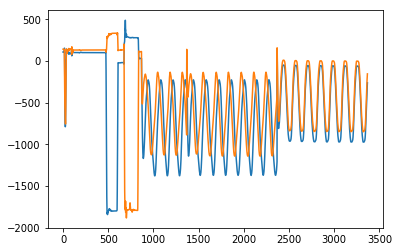

In [237]:
'''MOVING IN CIRCLES'''

duration = 10 # seconds
dt = 0.01 # seconds
num = int(duration/dt)

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

set_PID(8, 0.0006, 0.0)

# A sine wave to test
t0 = time.monotonic()
time.sleep(1.7)
t1 = time.monotonic()

for _ in range(num):
    
    setpoint = 1000.0 * math.sin((time.monotonic() - t0)*3)
    setpoint1 = 1000.0 * math.sin((time.monotonic() - t1)*3)
    # print("goto " + str(int(setpoint)))

    # go up and down trajectory
    my_drive.axis0.controller.pos_setpoint = setpoint-1000
    my_drive.axis1.controller.pos_setpoint = (setpoint-1000)

    # make circle
    #my_drive.axis0.controller.pos_setpoint = setpoint-1500
    #my_drive.axis1.controller.pos_setpoint = (setpoint1-1500)
    
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    trajectory.append([pos0, pos1])
    time.sleep(dt)
    
plt.plot(trajectory)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

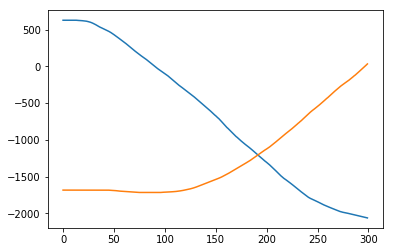

In [432]:
'''RECORD'''

trajectory = []
duration = 3 # seconds
dt = 0.01 # seconds
num = int(duration/dt)

for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    trajectory.append([pos0, pos1])
    time.sleep(dt)
    
plt.plot(trajectory)

In [ ]:
'''EXECUTE'''
set_PID(650, 2e-4, 2.5e-4)# 650 2e-4 3e-4

trajectory_est = []
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

while(True):
    if
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_est.append([pos0, pos1])
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    time.sleep(dt)
    
plt.figure(figsize=(20,10))
plt.plot(trajectory, '--')
plt.plot(trajectory_est)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

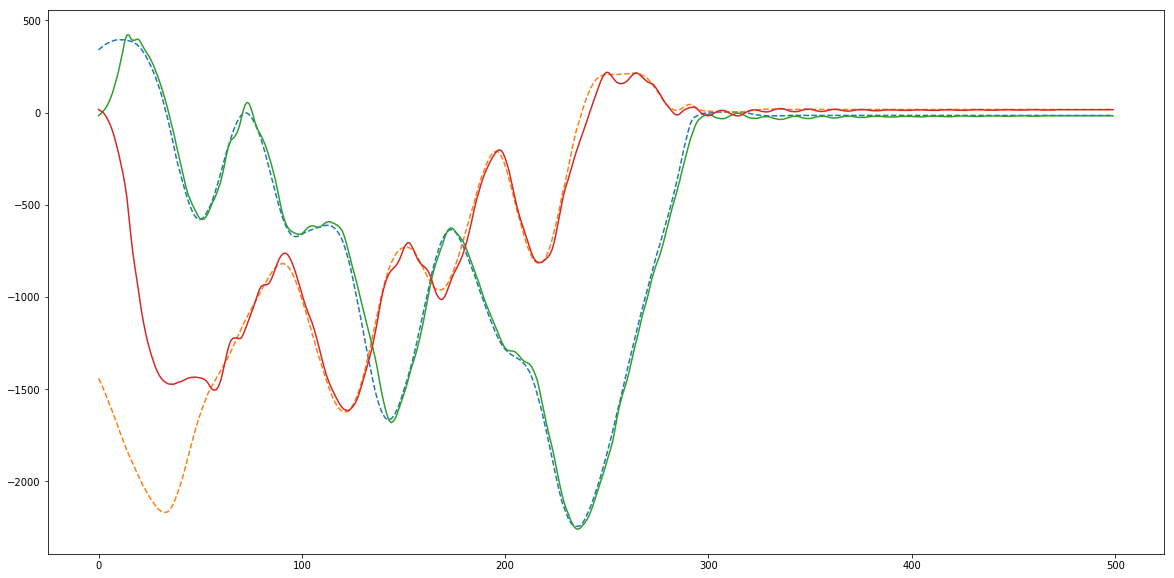

In [415]:
'''EXECUTE'''
set_PID(650, 2e-4, 2.5e-4)# 650 2e-4 3e-4

trajectory_est = []
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for point in trajectory:
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_est.append([pos0, pos1])
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    time.sleep(dt)
    
plt.figure(figsize=(20,10))
plt.plot(trajectory, '--')
plt.plot(trajectory_est)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

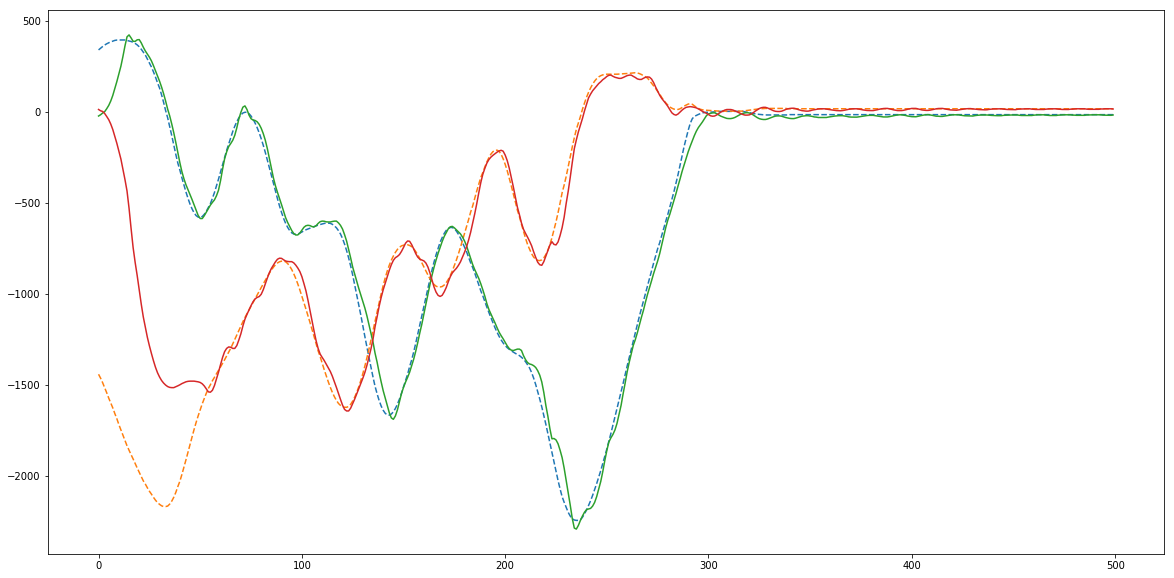

In [431]:
'''EXECUTE'''
set_PID(700, 2e-4, 2.5e-4)# 650 2e-4 3e-4

trajectory_est = []
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for point in trajectory:
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_est.append([pos0, pos1])
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    time.sleep(dt)
    
plt.figure(figsize=(20,10))
plt.plot(trajectory, '--')
plt.plot(trajectory_est)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [325]:
set_PID(60, 3e-4, 0)
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

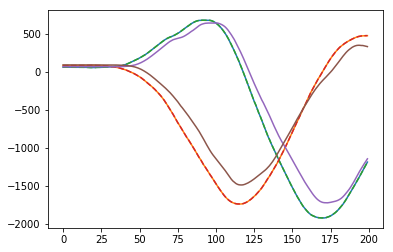

In [265]:
'''FOLLOWER'''

trajectory = []
duration = 2 # seconds
dt = 0.01 # seconds
num = int(duration/dt)

for _ in range(num):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate

    trajectory.append([pos0, pos1])
    time.sleep(dt)
    
plt.plot(trajectory)

time.sleep(2)

set_PID(60, 3e-4, 1e-4)

trajectory_est = []
my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for point in trajectory:
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory_est.append([pos0, pos1])
    
    set0, set1 = point
    my_drive.axis0.controller.pos_setpoint = set0
    my_drive.axis1.controller.pos_setpoint = set1
    
    time.sleep(dt)
    
#for point in reversed(trajectory):
#    pos0 = my_drive.axis0.encoder.pos_estimate
#    pos1 = my_drive.axis1.encoder.pos_estimate
#    trajectory_est.append([pos0, pos1])
   
#    set0, set1 = point
#    my_drive.axis0.controller.pos_setpoint = set0
#    my_drive.axis1.controller.pos_setpoint = set1
    
#    time.sleep(dt)
    
plt.plot(trajectory, '--')
plt.plot(trajectory_est)

my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

In [212]:
set_PID(0, 3e-4, 1e-4)

trajectory = []

hold0 = my_drive.axis0.encoder.pos_estimate
hold1 = my_drive.axis1.encoder.pos_estimate
print("hold: ", hold0, hold1)

my_drive.axis0.controller.pos_setpoint = hold0
my_drive.axis1.controller.pos_setpoint = hold1

my_drive.axis0.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
my_drive.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL

for _ in range(100):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    trajectory.append([pos0, pos1])

    sys.stdout.write("\r\rcpr0: " + str(pos0) \
                      + " cpr1: " + str(pos1) \
              + "\t vel_setpoint" + str(my_drive.axis0.controller.vel_setpoint)) 
    time.sleep(0.1)
    
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

hold:  108.80857849121094 143.1484375
cpr0: 31.056224822998047 cpr1: 114.80030059814453	 vel_setpoint0.0

KeyboardInterrupt: 

In [197]:
print()
print("hold: ", hold0, hold1)

my_drive.axis0.controller.pos_setpoint = hold0
# my_drive.axis1.controller.pos_setpoint = hold1


for _ in range(30):
    pos0 = my_drive.axis0.encoder.pos_estimate
    pos1 = my_drive.axis1.encoder.pos_estimate
    sys.stdout.write("\r\rcpr0: " + str(pos0) + " cpr1:" + str(pos1) + "\t vel_setpoint" + str(my_drive.axis0.controller.vel_setpoint)) 
    time.sleep(0.1)
    
    
my_drive.axis0.requested_state = AXIS_STATE_IDLE
my_drive.axis1.requested_state = AXIS_STATE_IDLE

NameError: name 'hold0' is not defined

In [ ]:
# ---------------------------------Index Saving Setup---------------------------------------------------

In [ ]:
# With this configuration, we only need to do this after each reboot:
# my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [195]:
my_drive.axis0.encoder.config.use_index = True

In [196]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [197]:
my_drive.axis0.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [198]:
my_drive.axis0.encoder.config.pre_calibrated = True

In [199]:
my_drive.axis0.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [200]:
my_drive.axis0.motor.config.pre_calibrated = True

In [201]:
my_drive.save_configuration()

In [473]:
my_drive.axis1.encoder.config.use_index = True

In [475]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [476]:
my_drive.axis1.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE

In [437]:
my_drive.axis1.encoder.config.pre_calibrated = False

In [381]:
my_drive.axis1.requested_state = AXIS_STATE_ENCODER_INDEX_SEARCH

In [438]:
my_drive.axis1.motor.config.pre_calibrated = False

In [233]:
my_drive.save_configuration()

In [71]:
# ---------------------------------Testings-----------------------------------------------------------

In [184]:
my_drive.axis1.encoder.pos_estimate

2.999999761581421

In [185]:
my_drive.axis1.encoder.vel_estimate

0.0

In [68]:
my_drive.axis0.motor.current_control.Iq_measured

0.0

In [ ]:
# ---------------------------------Configurations------------------------------------------------------

In [ ]:
my_drive.axis0.motor.config.pre_calibrated = False 
my_drive.axis0.motor.config.pole_pairs = 7 
my_drive.axis0.motor.config.calibration_current = 8.0 
my_drive.axis0.motor.config.resistance_calib_max_voltage = 2.0 
my_drive.axis0.motor.config.phase_inductance = 0.0
my_drive.axis0.motor.config.phase_resistance = 0.0 
my_drive.axis0.motor.config.direction = -1 
my_drive.axis0.motor.config.motor_type = 2 
my_drive.axis0.motor.config.current_lim = 20.0 
my_drive.axis0.motor.config.requested_current_range = 60.0 
my_drive.axis0.encoder.config.mode = 0 
my_drive.axis0.encoder.config.use_index = False
my_drive.axis0.encoder.config.pre_calibrated = False
my_drive.axis0.encoder.config.idx_search_speed = 10.0 
my_drive.axis0.encoder.config.cpr = 8192
my_drive.axis0.encoder.config.offset = -4392 
my_drive.axis0.encoder.config.offset_float = -0.030671894550323486 
my_drive.axis0.encoder.config.calib_range = 0.019999999552965164

my_drive.axis1.motor.config.pre_calibrated = False 
my_drive.axis1.motor.config.pole_pairs = 7 
my_drive.axis1.motor.config.calibration_current = 8.0 
my_drive.axis1.motor.config.resistance_calib_max_voltage = 2.0 
my_drive.axis1.motor.config.phase_inductance = 0.0
my_drive.axis1.motor.config.phase_resistance = 0.0 
my_drive.axis1.motor.config.direction = -1 
my_drive.axis1.motor.config.motor_type = 2 
my_drive.axis1.motor.config.current_lim = 20.0 
my_drive.axis1.motor.config.requested_current_range = 60.0 
my_drive.axis1.encoder.config.mode = 0 
my_drive.axis1.encoder.config.use_index = False
my_drive.axis1.encoder.config.pre_calibrated = False
my_drive.axis1.encoder.config.idx_search_speed = 10.0 
my_drive.axis1.encoder.config.cpr = 8192
my_drive.axis1.encoder.config.offset = -4392 
my_drive.axis1.encoder.config.offset_float = -0.030671894550323486 
my_drive.axis1.encoder.config.calib_range = 0.019999999552965164

In [ ]:
    # Default control
    my_drive.axis0.controller.config.vel_integrator_gain = 0.0010000000474974513
    my_drive.axis0.controller.config.vel_gain = 0.0005000000237487257
    my_drive.axis0.controller.config.pos_gain = 20.0

    # Spring-like control
    my_drive.axis0.controller.config.vel_integrator_gain = 0
    my_drive.axis0.controller.config.vel_gain = 0.0003
    my_drive.axis0.controller.config.pos_gain = 5

    # Testing out control
    my_drive.axis0.controller.config.vel_integrator_gain = 0
    my_drive.axis0.controller.config.vel_gain = 0.00035
    my_drive.axis0.controller.config.pos_gain = 6

In [ ]:
# ----------------------------------Other features-----------------------------------------------------

In [223]:
# To read a value, simply read the property
print("Bus voltage is " + str(my_drive.vbus_voltage) + "V")

# Or to change a value, just assign to the property
my_drive.axis0.controller.pos_setpoint = 3.14
print("Position setpoint is " + str(my_drive.axis0.controller.pos_setpoint))

Bus voltage is 24.201343536376953V
Position setpoint is 3.140000104904175


In [159]:
# And this is how function calls are done:
for i in [1,2,3,4,5,6,7,8]:
    print('voltage on GPIO{} is {} Volt'.format(i, my_drive.get_adc_voltage(i)))

voltage on GPIO1 is 0.8741455078125 Volt
voltage on GPIO2 is 0.7315429449081421 Volt
voltage on GPIO3 is 0.903149425983429 Volt
voltage on GPIO4 is 0.8677001595497131 Volt
voltage on GPIO5 is 1.408300757408142 Volt
voltage on GPIO6 is 0.857226550579071 Volt
voltage on GPIO7 is 0.8725341558456421 Volt
voltage on GPIO8 is 0.874951183795929 Volt


In [42]:
my_drive.GPIO_set_to_analog(my_drive.get_gpio_port_by_pin(1), 1);

AttributeError: 'RemoteObject' object has no attribute 'GPIO_set_to_analog'

In [160]:
my_drive.get_adc_voltage(1)

0.8596435189247131

In [43]:
my_drive.get_gpio_port_by_pin(1)

AttributeError: 'RemoteObject' object has no attribute 'get_gpio_port_by_pin'

In [206]:
# A sine wave to test
t0 = time.monotonic()
time.sleep(1.7)
t1 = time.monotonic()

while True:
    # prev 10000.0
    setpoint = 1000.0 * math.sin((time.monotonic() - t0)*3)
    setpoint1 = 1000.0 * math.sin((time.monotonic() - t1)*3)
#     print("goto " + str(int(setpoint)))

    # go up and down trajectory
    #my_drive.axis0.controller.pos_setpoint = setpoint-1000
    #my_drive.axis1.controller.pos_setpoint = (setpoint-1000)

    # make circle
    my_drive.axis0.controller.pos_setpoint = setpoint-1500
    my_drive.axis1.controller.pos_setpoint = (setpoint1-1500)
    
    
    time.sleep(0.001)

# Some more things you can try:

KeyboardInterrupt: 

In [152]:
# Write to a read-only property:
my_drive.vbus_voltage = 11.0  # fails with `AttributeError: can't set attribute`

# Assign an incompatible value:
my_drive.motor0.pos_setpoint = "I like trains"  # fails with `ValueError: could not convert string to float`

AttributeError: Attribute vbus_voltage not found

In [ ]:
import sys
sys.version